### 8.Robust PCA.

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from robust_pca import converged,shrink,_svd,norm_op,svd_reconstruct,pcp

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# prepare the images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

#Reshape image arrays from three dimensions to two dimensions
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

# Create a filter to select only the images corresponding to the digits 0 and 8
train_filter = np.where((train_labels == 0) | (train_labels == 8))
test_filter = np.where((test_labels == 0) | (test_labels == 8))

# Select only the images corresponding to the digits 0 and 8
train_images_filtered = train_images[train_filter]
test_images_filtered = test_images[test_filter]

In [4]:
L, S, examples = pcp(train_images_filtered.T)

rank sv: 1
error:  0.4601985596540044
rank sv: 40
error:  0.027493073355866142
rank sv: 40
error:  0.0009533893205413381
rank sv: 79
error:  6.216778568972657e-05
rank sv: 59
error:  3.291264393882429e-06
rank sv: 98
error:  1.8237567334680702e-07
rank sv: 69
error:  2.335959575775419e-08
rank sv: 108
error:  3.205875320153633e-09
rank sv: 73
error:  2.2457149266527538e-10


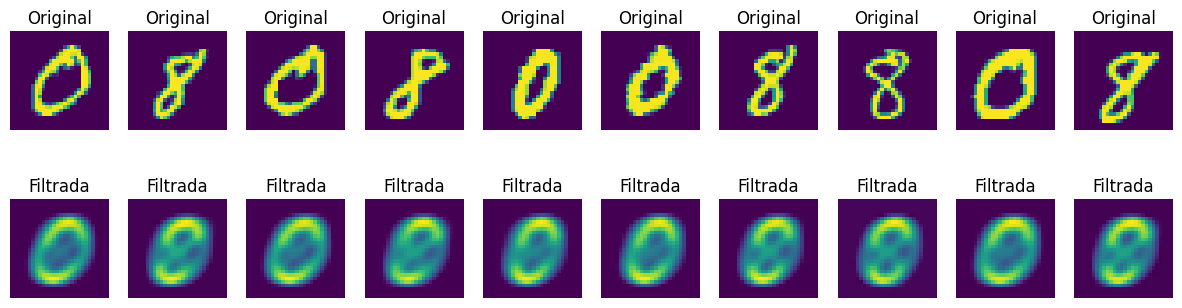

In [5]:
example_images = train_images_filtered[:10]

# Reorganizar las imágenes de ejemplo en una matriz
example_images = example_images.reshape(-1, 28, 28)

# Graficar las imágenes originales
fig, axs = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axs[0, i].imshow(example_images[i])
    axs[0, i].axis('off')
    axs[0, i].set_title('Original')

# Reconstruir las imágenes filtradas utilizando la matriz de bajo rango L
reconstructed_images = L.T.reshape(-1, 28, 28)[:10]

# Graficar las imágenes filtradas
for i in range(10):
    axs[1, i].imshow(reconstructed_images[i])
    axs[1, i].axis('off')
    axs[1, i].set_title('Filtrada')

plt.show()